<a href="https://colab.research.google.com/github/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/blob/main/Hate_Speech_Detection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from scipy import stats
import pickle

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import tensorflow.keras.regularizers as regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Import Dataset

In [2]:
url='https://raw.githubusercontent.com/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/main/train_E6oV3lV.csv'

df= pd.read_csv(url)

In [3]:
pd.set_option('display.max_colwidth', None)
df.sample(30)

,id,label,tweet
4381,4382,0,@user thanks for the car parking bill @user #neveragain
25205,25206,0,and that's all that matters ðð¼ð¯ #healthy #healthfirst #cleaneating #bodyproud #happinessâ¦
12245,12246,0,i am thankful for happiness. #thankful #positive
15646,15647,0,@user no words required today. #wewillnotgivein #weareorlando
8386,8387,0,ðððð#girls bihday#weekend#suumer#summeime @ ramenskoye
29778,29779,0,"can you say ""big brother?"" #orwellianprophecy"
2902,2903,0,"#arkansasdentalclinic the fun office! for adults and children! located in jonesboro, trumann, &amp; paragould."
18650,18651,0,sunny summer days ð #flowers #fashionblogger
12030,12031,0,why can't noco just be killed off already? #annoyingchild #hateher #getrid #nogood #hollyoaks
938,939,0,my hea goes out to the families of those 50 people killed in the massacre in orlando.


In [4]:
df.index=df["id"]
df.drop('id', axis=1, inplace=True)
df.sample(5)

,label,tweet
id,,
18569,0,@user my fitbit flex doesn't want to sync to my app anymore and it's been 6 days! help! #notsofit
22329,0,waiting for the arrival of my sister and nephew. oh how i've missed them.
15212,0,(standard american diet) is really sad! facing the truth is even sadder...
1425,0,i am thankful for computers. #thankful #positive
30617,0,@user how to get hyped: remember @user tour in november w/ @user


### Data Analysis

In [5]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


In [6]:
#  Check the Missing Value
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [8]:
# Extracting the Target Attribute for Each Class and Visualize
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


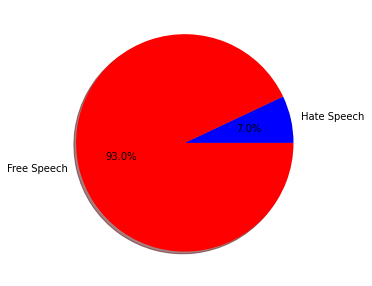

In [9]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.figure(figsize=(5, 5))
plt.pie(speech, labels = label, shadow = True, autopct = '%1.1f%%', colors=['blue', 'red'])
plt.style.use('fivethirtyeight')
plt.show()

### Add features

In [10]:
# Number of characters in the text
df['tweet_length'] = df['tweet'].apply(len)

# Number of words in the text
df['tweet_num_words'] = df['tweet'].apply(lambda x: len(x.split()))

# Average length of the words in the text
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Number of non-stopwords in the text: first we will extend the stopwords to include other words used in twitter
# such as retweet(rt) etc.

# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
df['tweet_non_stopwords'] = df['tweet'].apply(lambda x: len([t for t in x.split() if t not in stopwords]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.000000,0.0,0.0,1.000000
tweet_length,31962.0,84.739628,29.455749,11.0,63.000000,88.0,108.0,274.000000
tweet_num_words,31962.0,13.158720,5.478150,3.0,9.000000,13.0,17.0,34.000000
mean_word_len,31962.0,5.593463,1.945719,1.0,4.529412,5.2,6.2,81.333333
tweet_non_stopwords,31962.0,9.121144,3.474333,0.0,7.000000,9.0,11.0,27.000000


In [11]:
df.head()

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,4.555556,8
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,5.315789,14
3,0,bihday your majesty,21,3,5.666667,2
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,4.928571,9
5,0,factsguide: society now #motivation,39,4,8.000000,3


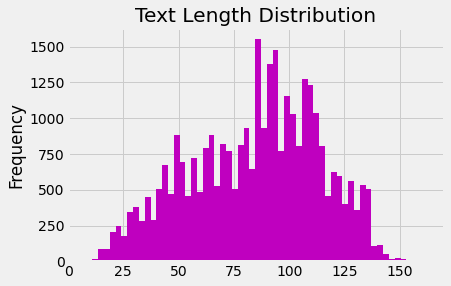

In [12]:
df["tweet_length"].plot(kind='hist', title='Text Length Distribution', xlim=[0, 170], bins = 100, figsize=(6,4),color='m')
plt.show()

**Note** : Distribution of text-length is between 5 and 150 where the most tweets-length are around 90 characters. It is also noticable that the number of tweets seem to be skewed.

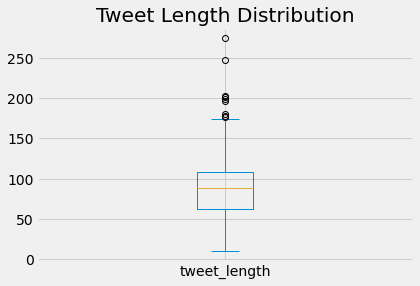

In [13]:
df["tweet_length"].plot(kind='box', title='Tweet Length Distribution', figsize=(6,4))
plt.show()

## Data Preprocessing

#### 1. Text Cleaning
- Lowercase
- Remove Punctuation
- Remove Urls
- Removing @tags
- Remove Special Characters

#### 2. Preprocessing Operations
- Tokenizing
- Removing Stop Words
- Lemmatization
- WordCloud

In [14]:
def clean_txt(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    Tweet = re.sub(regex_pat," ",tweet)
    
    #Remove @tags
    Tweet= re.sub(r'@[\w\-]+',"",Tweet)
    
    # removal of links[https://abc.com]
    url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    Tweet = re.sub(url_regex,"",Tweet)
    
    # split into words (tokenizing)
    Tweet = nltk.word_tokenize(Tweet)
    
    # convert to lower case
    Tweet = [w.lower() for w in Tweet]    
    
    # remove punctuation from each word
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    Tweet = [re_punc.sub('', w) for w in Tweet]

    # remove remaining tokens that are not alphabetic
    Tweet = [word for word in Tweet if word.isalpha()]

    # filter out stop words
    Tweet = [w for w in Tweet if w not in  stopwords] 
    
    # filter out short tokens
    Tweet = [word for word in Tweet if len(word) > 2]

    #Stemm all the words in the sentence
    lemmatizer = WordNetLemmatizer() 
    lem_words = [lemmatizer.lemmatize(word) for word in Tweet]
    combined_text = ' '.join(lem_words)
    return combined_text

# Cleaning the text data
df['cleaned_phrase'] = df['tweet'].apply(clean_txt)
df.sample(10)

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords,cleaned_phrase
id,,,,,,,
9865,0,"watch #udtapunjab' to know reality: #bhagwantmann, #ghuggi tell -#bjp",72,9,6.777778,8,watch udtapunjab know reality bhagwantmann ghuggi tell bjp
20558,0,fckn did it!!! ð¸ðºð #feeling #awesome #personalizedâ¦,65,7,8.000000,6,fckn feeling awesome
2890,0,no #rum no #montauk no #beach just a couple of #dogs and a #chuckle . #summer safeâ¦,88,17,4.058824,9,rum montauk beach couple dog chuckle summer
17850,0,@user should be asleep with my boo rn but i'm not,52,11,3.545455,5,asleep boo
31361,0,we have the @user @user monoflap dressage saddle in the studio ready for clients to try!,90,16,4.562500,9,monoflap dressage saddle studio ready client try
6048,0,i am joy. #i_am #positive #affirmation,43,6,5.500000,4,joy iam positive affirmation
992,0,#closeencounters of the #fatkind #fatkid #dese #sick #tired #maybemono,73,9,6.888889,7,closeencounters fatkind fatkid dese sick tired maybemono
2448,0,"dese niggas will show dese otha bitches on fb, snap nd twitter more attention then dey do their own girl but #true ð¯",121,23,4.217391,15,dese nigga show dese otha bitch snap twitter attention dey girl true
9790,0,kilarney today :d insomnia con tomorrow ^-^ gosh i have a busy weekend ahead of me #work #hype,96,18,4.277778,13,kilarney today insomnia con tomorrow gosh busy weekend ahead work hype


In [15]:
# label_list = df.label.values.tolist()
cleaned_phrase_list = df.cleaned_phrase.values.tolist()
print(cleaned_phrase_list)
# print(label_list)

['father dysfunctional selfish drag kid dysfunction run', 'thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked', 'bihday majesty', 'model love take time', 'factsguide society motivation', 'huge fan fare big talking leave chaos pay dispute get allshowandnogo', 'camping tomorrow', 'next school year year think school exam hate imagine actorslife revolutionschool girl', 'love land allin cavs champion cleveland clevelandcavaliers', 'welcome', 'ireland consumer price index mom climbed previous may blog silver gold forex', 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love', 'get see daddy today gettingfed', 'cnn call michigan middle school build wall chant tcot', 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins', 'ouch junior junior yugyoem omg', 'thankful paner thankful positive', 'retweet agree', 'friday smile around via user cooky make people', 'know essential oil made 

In [16]:
# def to_array(text):
#     array = np.array(text)
#     return array

Y = df.label.to_numpy()
Y

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
#tokenization
max_words = 10000
max_len = 1500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(cleaned_phrase_list)
sequences = tok.texts_to_sequences(cleaned_phrase_list)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[   0,    0,    0, ...,  116, 6570,  306],
       [   0,    0,    0, ..., 3630, 6572, 8402],
       [   0,    0,    0, ...,    0,   17, 2812],
       ...,
       [   0,    0,    0, ..., 6355,   24,   59],
       [   0,    0,    0, ..., 1330, 1331,  421],
       [   0,    0,    0, ...,    0,   90,   99]], dtype=int32)

In [18]:
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.optimizers import Adam


embedding_mat_col=512

# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=embedding_mat_col, input_length=max_len))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(50, dropout=0.4, recurrent_dropout=0.4,input_shape=(None, 512)))
# model.add(Dense(1,activation='softmax'))



model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_mat_col, input_length=max_len),
    tf.keras.layers.LSTM(10, dropout=0.4, recurrent_dropout=0.4, input_shape=(None, 512)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 512)         5120000   
                                                                 
 lstm (LSTM)                 (None, 10)                20920     
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                        

In [19]:
X=sequences_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(22373, 1500) (22373,)
(9589, 1500) (9589,)


In [20]:
batch_size =32
model.fit(X_train, Y_train, epochs = 1, batch_size=batch_size,verbose = 1)

700/700 [==============================] - 2435s 3s/step - loss: 0.1990 - accuracy: 0.9304


In [21]:
prediction=model.predict(X_test)

300/300 [==============================] - 95s 314ms/step


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','wb'))

In [32]:
model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','rb'))

In [71]:
Hate_Free=[]
predictions=[]
for itm in prediction:
  predictions.append(itm)
  if int(itm)==0:
      Hate_Free.append("Hate_Speech")
  else:
      Hate_Free.append("Free_Speech")

results = pd.DataFrame({'lablel':Y_test,'prediction':predictions, 'Hate_Free_speech': Hate_Free})
results["prediction"]=results["prediction"].astype(int)

results.sample(20)
# results.info()
        
  #  astype(str).     
# print('Test Accuracy: ', accuracy_score(Y_test, prediction) * 100, '\n')
# print('Confusion Matrix : \n',confusion_matrix(Y_test, prediction), '\n')
# print('Classification Report : \n ',classification_report(Y_test, prediction), '\n')
# print(Y_test, '\n',Prediction1)

,lablel,prediction,Hate_Free_speech
5592,0,0,Hate_Speech
6581,0,0,Hate_Speech
8049,0,0,Hate_Speech
177,0,0,Hate_Speech
6554,0,0,Hate_Speech
9562,0,0,Hate_Speech
7378,0,0,Hate_Speech
4770,0,0,Hate_Speech
8526,0,0,Hate_Speech
2192,0,0,Hate_Speech


Mounted at /content/drive


### Visualizations

Visualizing which of the word is most commonly used in the twitter dataset

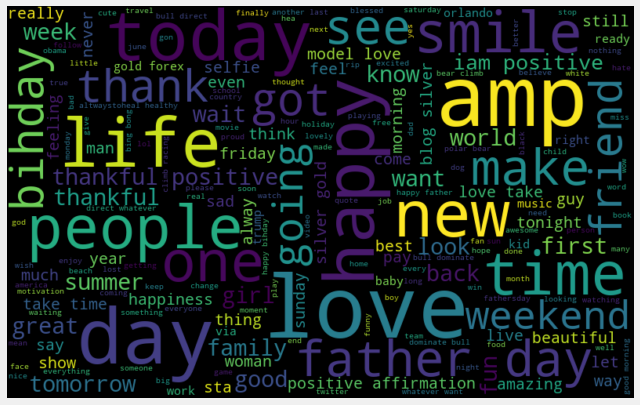

In [25]:
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in df['cleaned_phrase'] ])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for hate speech

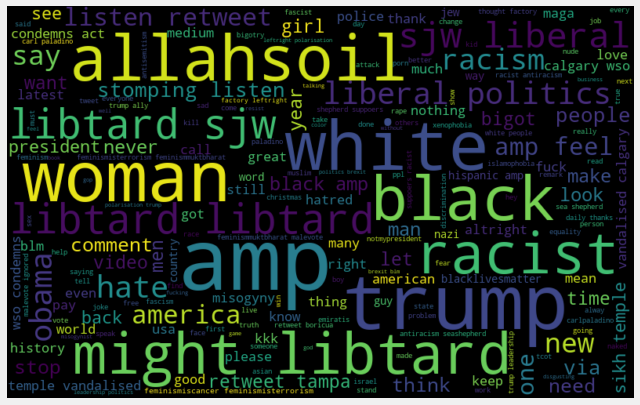

In [26]:
hate_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 1]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for free speech

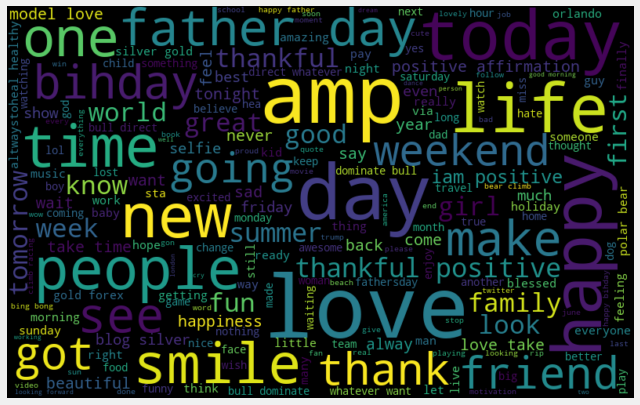

In [27]:
free_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 0]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(free_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()